<h1>Actividad Guiada 2 de Algoritmos de Optimización<h1>

Nombre: José Jesús La Casa Nieto

https://colab.research.google.com/drive/1kfePX_O7XSBWQTjjJuIqKtSSLdmPy5M2?usp=sharing

https://github.com/JoseJesusLaCasaNieto/03MIAR---Algoritmos-de-Optimizacion---2024

In [113]:
import math
import numpy as np
import itertools
import matplotlib.pyplot as plt
import random
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d

#### Viaje por el río - Programación dinámica

In [2]:
# Viaje por el río - Programación dinámica

TARIFAS = [
[0, 5, 4, 3, float("inf"), float("inf"), float("inf")],
[float("inf"), 0, float("inf"), 2, 3, float("inf"), 11],
[float("inf"), float("inf"), 0, 1, float("inf"), 4, 10],
[float("inf"), float("inf"), float("inf"), 0, 5, 6, 9],
[float("inf"), float("inf"), float("inf"), float("inf"), 0, float("inf"), 4],
[float("inf"), float("inf"), float("inf"), float("inf"), float("inf"), 0, 3],
[float("inf"), float("inf"), float("inf"), float("inf"), float("inf"), float("inf"), 0]
]

TARIFAS

[[0, 5, 4, 3, inf, inf, inf],
 [inf, 0, inf, 2, 3, inf, 11],
 [inf, inf, 0, 1, inf, 4, 10],
 [inf, inf, inf, 0, 5, 6, 9],
 [inf, inf, inf, inf, 0, inf, 4],
 [inf, inf, inf, inf, inf, 0, 3],
 [inf, inf, inf, inf, inf, inf, 0]]

In [3]:
def Precios(TARIFAS):
  N = len(TARIFAS[0])

  PRECIOS = [[9999]*N for i in [9999]*N]
  RUTA = [[""]*N for i in [""]*N]

  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS, RUTA

In [4]:
PRECIOS,RUTA = Precios(TARIFAS)

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, inf, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, inf, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [5]:
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0, 6)


La ruta es:


'0,2,5'

#### Asignación de tareas - Ramificación y poda

In [55]:
# Asignación de tareas - Ramificación y poda.

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

In [56]:
def valor(S, COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR

valor((3,2,), COSTES)

34

In [62]:
def fuerza_bruta(COSTES):
  mejor_valor = float('inf')
  mejor_solucion = ()

  iteraciones = 0
  for s in list(itertools.permutations(range(len(COSTES)))):
    valor_tmp = valor(s, COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor = valor_tmp
      mejor_solucion = s
    iteraciones += 1

  print(f"La mejor solución en {iteraciones} iteraciones es {mejor_solucion} con valor {mejor_valor}.")

fuerza_bruta(COSTES)

La mejor solución en 24 iteraciones es (0, 3, 1, 2) con valor 61.


In [58]:
def CI(S, COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  for i in range(len(S), len(COSTES)):
    VALOR += min([COSTES[j][i] for j in range(len(S), len(COSTES))])
  return VALOR

def CS(S, COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  for i in range(len(S), len(COSTES)):
    VALOR += max([COSTES[j][i] for j in range(len(S), len(COSTES))])
  return VALOR

CI((0,1), COSTES)

68

In [59]:
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N):
    if i not in NODO:
      HIJOS.append({'s': NODO + (i,)})
  return HIJOS

crear_hijos((0,), 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [60]:
def ramificacion_y_poda(COSTES):
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION = tuple(i for i in range(len(COSTES)))
  CotaSup = valor(MEJOR_SOLUCION,COSTES)

  NODOS = []
  NODOS.append({'s':(), 'ci':CI((),COSTES)})

  iteracion = 0

  while(len(NODOS) > 0):
    iteracion += 1

    nodo_prometedor = [min(NODOS, key=lambda x:x['ci'])][0]['s']

    HIJOS =[{'s': x['s'], 'ci': CI(x['s'], COSTES)} for x in crear_hijos(nodo_prometedor, DIMENSION)]

    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION ]
    if len(NODO_FINAL) >0:
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup]

    NODOS.extend(HIJOS)

    NODOS = [x for x in NODOS if x['s'] != nodo_prometedor]

  print("La solucion final es:", MEJOR_SOLUCION, "en", iteracion, "iteraciones", "para dimensión:",DIMENSION)

ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}] en 10 iteraciones para dimensión: 4


In [101]:
# Mejorar nota

COSTES = np.random.randint(1, high=100, size=(5, 4, 4))

def valor(S, COSTES):
  VALOR = 0
  iteraciones = 0
  for capa in COSTES:
    for i in range(len(S)):
      VALOR += capa[i][S[i]]
      iteraciones += 1
  return iteraciones, VALOR

def fuerza_bruta(COSTES):
  mejor_valor = float('inf')
  mejor_solucion = ()

  for s in list(itertools.permutations(range(COSTES.shape[1]))):
    iteraciones, valor_tmp = valor(s, COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor = valor_tmp
      mejor_solucion = s

  print(f"La mejor solución en {iteraciones} iteraciones es {mejor_solucion} con valor {mejor_valor}.")

fuerza_bruta(COSTES)

La mejor solución en 20 iteraciones es (3, 2, 1, 0) con valor 806.


#### Descenso del gradiente

In [107]:
# Descenso del gradiente

import math
import matplotlib.pyplot as plt
import numpy as np
import random

In [108]:
f  = lambda X: X[0]**2 + X[1]**2
df = lambda X: [2*X[0], 2*X[1]]

df([1,2])

[2, 4]

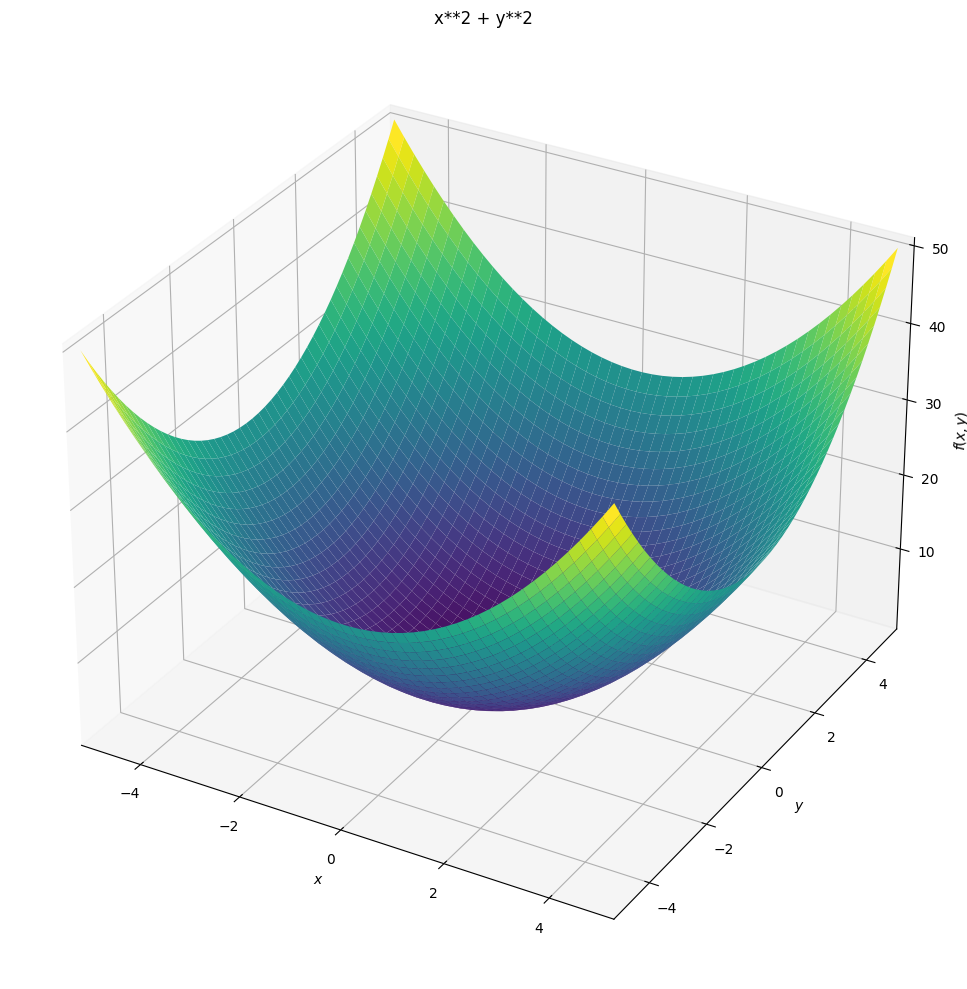

In [109]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d

x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x, -5, 5), (y, -5, 5),
       title = 'x**2 + y**2',
       size = (10,10))

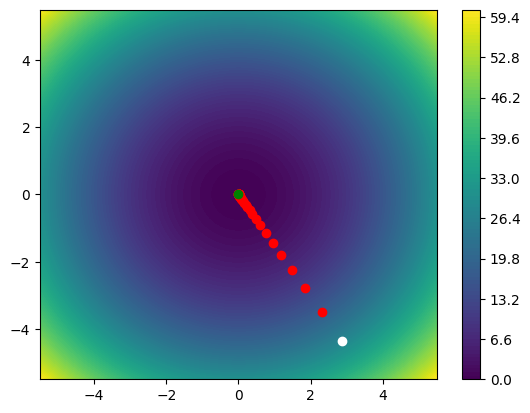

Solucion: [4.11058099586616e-05, -6.23458917734309e-05] 5.576697833381961e-09


In [14]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango = 5.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy, ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
plt.plot(P[0], P[1], "o", c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA = .1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
  plt.plot(P[0], P[1], "o", c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0], P[1], "o", c="green")
plt.show()
print("Solucion:", P, f(P))

In [111]:
# Mejorar nota

#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))

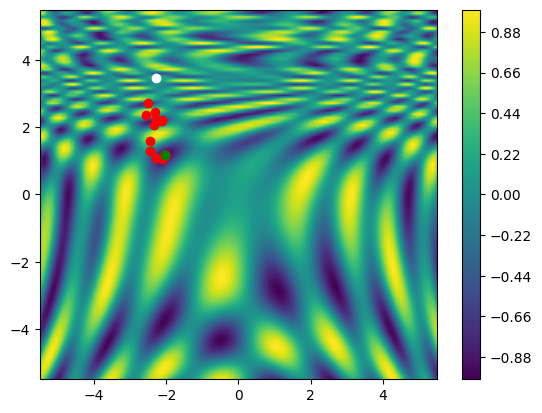

Solucion: [-2.0276506180891842, 1.1718268361524113] -1.0


In [112]:
# Definir el gradiente de la función
def df(X):
    df_dx = X[0] * math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1])) - \
            math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * (math.sin(2*X[0] + 1 - math.exp(X[1])) * 2)
    df_dy = -1/2 * X[1] * math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1])) - \
            math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * (math.sin(2*X[0] + 1 - math.exp(X[1])) * (-math.exp(X[1])))
    return [df_dx, df_dy]

# Preparar los datos para dibujar el mapa de niveles de Z
resolucion = 100
rango = 5.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x,y])

# Pintar el mapa de niveles de Z
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

# Generar un punto aleatorio inicial y pintarlo de blanco
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
plt.plot(P[0], P[1], "o", c="white")

# Tasa de aprendizaje
TA = .1

# Iteraciones
for _ in range(50):
    grad = df(P)
    P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
    plt.plot(P[0], P[1], "o", c="red")

# Dibujar el punto final y pintarlo de verde
plt.plot(P[0], P[1], "o", c="green")
plt.show()
print("Solucion:", P, f(P))